# K-Nearest Neighbors (KNN)
## Language: Julia
## Author: Daisy Nsibu
### Data 4319 - Statistical and Machine Learning

# 1. Introduction

k Nearest neighbors (kNN) is one of the simplest and one of the oldest  machine learning algorithtms there is. 
![](https://miro.medium.com/max/800/0*R9pofHZy-iaFTE7F.png)
### What is KNN?

A simple supervised learning algorithm. So this algorithm can be used for:
+ classification ( the labels are qualitative, of some type of class)
+ regression ( have labels that are continous, real values)
+ search (reccomendations) algorithm

### How does kNN work?

It makes no mathematical assumptions, and it doesn’t require any sort of heavy machinery. 

The only things it requires are:

•	Some notion of distance

•	An assumption that points that are close to one another are similar

If we take a look at the graph,  we can determine the  class of the new point (star) if we look to the *k* closest neighbors to the star. The way the *k* nearest neighbors works is sort of similar to a [greedy algorithm](https://en.wikipedia.org/wiki/Greedy_algorithm) approach. so we see of  all of the neighbors that are with this new point, we're going to take the mode of them. There's either type 1 or type 2. So with this observation we would predict that since the purple's (class b) dominate everything at *k=3* , we would predict that this new point is a purple point, because the *k* closest things, the closest feature vectors to that feature vector are class B (purple). However, at *k=6* we would predict that this new point is a yellow point, because the *k* closest things, the closest feature vectors to that feature vector are class A (yellow). So we assume that all the class B data points kind of lie around each other, and all the class A data points hangout together.

In order to implement k-nearest neighbors we some metric to determine distance. In this notebook, we're going to use the **standard euclidean distance**.

$$d(x^{i}, x^{j}) = \sqrt{\sum_{n=1}^{l}(x^{i}_{n}-x^{j}_{n})^{2}}$$

So, we choose a value for k and then we put it in n dimensional space and then we calculate all the points around it. The *k* closest of those for classification, the mode of that, out of *k* would give us our label. It's kind of assuming the data, the feature vectors all hangout together sort of in classes. 

So in classification typically we're going to choose *k* to be odd, because that will break the ties that might happen. You might choose an even *k* and you might have two neighbors of class 1 and two neighbors of class 2. So, in order to break that classification we typically choose k to be odd.

When dealing with regression of the *k* closest points, you take the mean of those *k* closest points and that gives you your real number output.

#### Advantages
+ simple, very easy to implement from scratch
+ no optimization of parameters
So when we look at the PLA, we were iteratively updating the weights for our model. We were basically optimizing our weights. In kNN we're not optimizing weights at all because there's no parameters to optimize there. We are admittedly doing a greeedy appraoch, looking at the k nearest things to the point in question and then the majority rules and so that's the label it gets.
+ easy to do classification, regression, and reccomendations

#### Disadvantages
+ slow
+ sensitive to high dimension feature vectors
So when your feature vectors are very high dimensional this notion of distance *d* might not capture how the points relate to each other.

# 2. Load Packages

In [1]:
using Pkg
using Plots
using RDatasets
using CSV
using Random
using DataFrames

# 3. Load Data

In [2]:
iris = dataset("datasets", "iris")
x_data = [x for x in zip(iris.SepalLength, iris.SepalWidth, iris.PetalLength)]
y_data = [iris.Species[i] for i=1:150];

In [3]:
x_data


150-element Array{Tuple{Float64,Float64,Float64},1}:
 (5.1, 3.5, 1.4)
 (4.9, 3.0, 1.4)
 (4.7, 3.2, 1.3)
 (4.6, 3.1, 1.5)
 (5.0, 3.6, 1.4)
 (5.4, 3.9, 1.7)
 (4.6, 3.4, 1.4)
 (5.0, 3.4, 1.5)
 (4.4, 2.9, 1.4)
 (4.9, 3.1, 1.5)
 (5.4, 3.7, 1.5)
 (4.8, 3.4, 1.6)
 (4.8, 3.0, 1.4)
 ⋮
 (6.0, 3.0, 4.8)
 (6.9, 3.1, 5.4)
 (6.7, 3.1, 5.6)
 (6.9, 3.1, 5.1)
 (5.8, 2.7, 5.1)
 (6.8, 3.2, 5.9)
 (6.7, 3.3, 5.7)
 (6.7, 3.0, 5.2)
 (6.3, 2.5, 5.0)
 (6.5, 3.0, 5.2)
 (6.2, 3.4, 5.4)
 (5.9, 3.0, 5.1)

In [4]:
y_data

150-element CategoricalArrays.CategoricalArray{String,1,UInt8}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [5]:
x_data[1]

(5.1, 3.5, 1.4)

In [6]:

y_data[1]

CategoricalArrays.CategoricalValue{String,UInt8} "setosa"

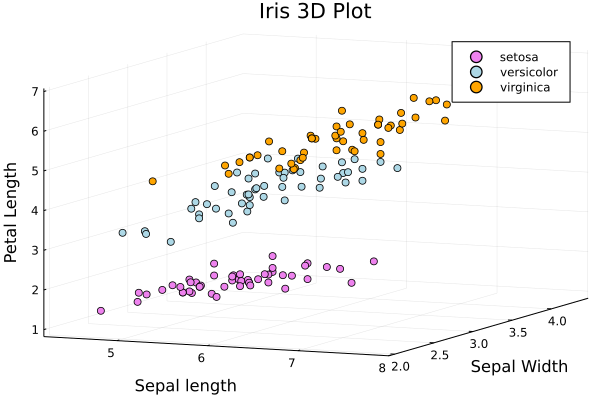

In [7]:
scatter(xaxis="Sepal length",
        yaxis="Sepal Width",
        zaxis="Petal Length",
        title="Iris 3D Plot")
scatter!(x_data[1:50], label = "setosa", color = "violet")
scatter!(x_data[51:100], label = "versicolor", color = "lightblue")
scatter!(x_data[101:150], label = "virginica", color = "orange")

# 4. Implementing k-Nearest Neighbors

## 4.1. Distance Function

In [8]:
# standard euclidean distance
function distance(p1,p2)
    return sqrt(sum((p1[i] - p2[i])^2 for i = 1:length(p1)))
end

distance (generic function with 1 method)

In [9]:
test_array = [(distance(x_data[120], x_data[i]), y_data[i]) for i = 1:length(x_data)]
sort!(test_array, by = x -> x[1])

150-element Array{Tuple{Float64,CategoricalArrays.CategoricalValue{String,UInt8}},1}:
 (0.0, "virginica")
 (0.4242640687119283, "virginica")
 (0.4242640687119283, "virginica")
 (0.43588989435406705, "versicolor")
 (0.5099019513592784, "versicolor")
 (0.5385164807134505, "versicolor")
 (0.5477225575051662, "virginica")
 (0.5477225575051662, "virginica")
 (0.5916079783099615, "virginica")
 (0.6403124237432846, "virginica")
 (0.6633249580710798, "virginica")
 (0.6782329983125264, "versicolor")
 (0.6782329983125264, "versicolor")
 ⋮
 (4.047221268969612, "setosa")
 (4.047221268969612, "setosa")
 (4.054626986542658, "setosa")
 (4.06201920231798, "setosa")
 (4.109744517606903, "setosa")
 (4.115823125451335, "setosa")
 (4.144876355212541, "setosa")
 (4.148493702538308, "setosa")
 (4.153311931459037, "setosa")
 (4.209513035969837, "setosa")
 (4.328972164382672, "setosa")
 (4.46318272088428, "setosa")

In [10]:
distance(x_data[1], x_data[112])

4.188078318274385

## 4.2. K-NN

In [11]:
function KNN(p, features, labels, k)
    distance_array = [(distance(p, features[i]), labels[i]) for i = 1:length(features)]
    sort!(distance_array, by = x -> x[1])
    return  distance_array[1:k]
end

KNN (generic function with 1 method)

In [12]:
KNN(x_data[120], x_data, y_data, 3)

3-element Array{Tuple{Float64,CategoricalArrays.CategoricalValue{String,UInt8}},1}:
 (0.0, "virginica")
 (0.4242640687119283, "virginica")
 (0.4242640687119283, "virginica")

In [13]:
function KNN_iris_predictor(p, features, labels, k)
    neighbors = KNN(p, features, labels, k)
    Setosa_count = [1.0 for x in neighbors if x[2] == "setosa"]
    Virginica_count = [1.0 for x in neighbors if x[2] == "virginica"]
    Versicolor_count = [1.0 for x in neighbors if x[2] == "versicolor"]
    
    temp_list = [("setosa", Setosa_count), ("versicolor", Versicolor_count), ("virginica", Virginica_count)]
    sort!(temp_list, by = x -> x[2])
    return temp_list[end][1]
end
    

KNN_iris_predictor (generic function with 1 method)

## 4.3. Results

In [14]:
KNN_iris_predictor(x_data[120],x_data, y_data, 5)

"virginica"

# 5. k-Nearest Neighbors as a Song Reccomendation System
![](https://images.unsplash.com/photo-1483412033650-1015ddeb83d1?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTN8fG11c2ljfGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=900&q=60)

## 5.1. Loading data

In [15]:
songs = CSV.read("data.csv", DataFrame);

## 5.2. Data Exploration

In [16]:
# row and columns size of dataset
size(songs)


(2017, 17)

There are 2017 rows and 17 columns, with 13 columns as song characteristics in the dataset.

In [17]:
# List of columns
names(songs)

17-element Array{String,1}:
 "Column1"
 "acousticness"
 "danceability"
 "duration_ms"
 "energy"
 "instrumentalness"
 "key"
 "liveness"
 "loudness"
 "mode"
 "speechiness"
 "tempo"
 "time_signature"
 "valence"
 "target"
 "song_title"
 "artist"

## 5.3. X and y arrays

In [18]:
x_song_data = [x for x in zip(songs.danceability, songs. instrumentalness, songs.speechiness, songs.valence)]
y_song_data = [x for x in songs.song_title]

2017-element Array{String,1}:
 "Mask Off"
 "Redbone"
 "Xanny Family"
 "Master Of None"
 "Parallel Lines"
 "Sneakin’"
 "Childs Play"
 "Gyöngyhajú lány"
 "I've Seen Footage"
 "Digital Animal"
 "Subways - In Flagranti Extended Edit"
 "Donme Dolap - Baris K Edit"
 "Cemalim"
 ⋮
 "Spoon Me - Slushii Remix"
 "Scared To Be Lonely (Conro Remix)"
 "Let It Go - Scott Melker & Mister Gray Remix"
 "Call On Me - EDWYNN X TIKAL, Spirix Remix"
 "Aamon"
 "Hey Baby - Steve Aoki Remix"
 "Brightside - Borgeous Remix"
 "Like A Bitch - Kill The Noise Remix"
 "Candy"
 "Habit - Dack Janiels & Wenzday Remix"
 "First Contact"
 "I Wanna Get Better"

Our *label* only displays the song title. What if there are multiple songs in the dataset with the same title?

I'll add the artist name to the title of the song for the label just in case there are songs with the same name, and that way we'll be able to identify the difference. 

In [19]:
# new column called, Title_artist
songs.title_artist = string.(songs.song_title, " by ",  songs.artist);

In [20]:
# the new label
y_song_data = [x for x in songs.title_artist];

## 5.4. Implementation

### Choosing a Random song

In [21]:
random_song=songs[rand(1:(size(songs,1)),1),:]
println("\n  1 Random Song from the Dataset:\n", random_song[1, "title_artist"])


  1 Random Song from the Dataset:
Centuries by Fall Out Boy


### Reccomender

In [22]:
function more_like_this(song_name, features, labels, k)
    for i = 1:length(labels)
        if labels[i] == song_name
            neighbors = KNN(features[i], features, labels, k+1)
            println("The top $k songs similar to $song_name are:")
            for j = 2:k+1
                println("$(j-1). ", neighbors[j][2])
            end
        end
    end
end

more_like_this (generic function with 1 method)

## 5.5. Results

In [23]:
more_like_this(random_song[1, "title_artist"], x_song_data, y_song_data, 5)

The top 5 songs similar to Centuries by Fall Out Boy are:
1. Symphony of the Nymph by Ariel Pink's Haunted Graffiti
2. Mykonos (feat. Fleet Foxes) by Rhythms Del Mundo
3. Just A Little Lovin' by Dusty Springfield
4. Like You That Way by Canaan Smith
5. Kiwi by Harry Styles
